In [473]:
# Importing the neccessary libraries.
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
from scipy.stats import chi2_contingency

In [474]:
# Setting the pandas dataframe and visualization :
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format',lambda x: '%.3f' % x)

sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [475]:
# Setting the working directory :
os.chdir("D:/PROJECT DATA SCIENCE/4.BIKE RENTING EDWISOR")

In [476]:
# Getting the current working directory :
os.getcwd()

'D:\\PROJECT DATA SCIENCE\\4.BIKE RENTING EDWISOR'

In [477]:
# Loading the data and making the first column as index :
data_raw = pd.read_csv("day.csv",index_col=['instant'])

In [478]:
# Getting a view on the data :
data_raw.head(10)

# Results:
# 1. The data already has index.
# 2. The column "yr" & "mnth" have redundant information as "dteday" has same information.
# 3. "cnt" is the sum of "casual" and "registered".

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204,0.233,0.518,0.090,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.197,0.209,0.499,0.169,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162,0.536,0.267,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138,0.116,0.434,0.362,54,768,822


In [479]:
# Renaming the variables :
data_raw = data_raw.rename(columns = {'dteday':'date'})

In [480]:
# Reset the index :
data = data_raw.reset_index(drop=True)

In [481]:
data.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [482]:
# Getting the shape of the dataframe :
data.shape

(731, 15)

In [483]:
# Making a copy of the data :
d1 =data.copy()

In [484]:
d1.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [485]:
# Getting a summary of the data :
d1.info()

# Result :
# 1. There are no missing values.
# 2. 731 observations and 15 columns.
# 3. Several columns have been read with improper datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
date          731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [486]:
# Changing the datatypes of several variables :
d1['date'] = pd.to_datetime(d1['date'])
d1['season'] = d1['season'].astype('category')
d1['yr'] = d1['yr'].astype('category')
d1['mnth'] = d1['mnth'].astype('category')
d1['holiday'] = d1['holiday'].astype('category')
d1['weekday'] = d1['weekday'].astype('category')
d1['workingday'] = d1['workingday'].astype('category')
d1['weathersit'] = d1['weathersit'].astype('category')

In [487]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
date          731 non-null datetime64[ns]
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.1 KB


In [488]:
# Describing categorical variables :
d1.describe(include=['category'])

# Results:
# 1. Out of 731 data points, 710 are given for holidays.
# 2. Weather sit has only 3 categories out of four as given in the description.

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,731,731,731,731,731,731,731
unique,4,2,12,2,7,2,3
top,3,1,12,0,6,1,1
freq,188,366,62,710,105,500,463


In [489]:
# Describing numerical variables :
d1.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,0.495,0.474,0.628,0.190,848.176,3656.172,4504.349
std,0.183,0.163,0.142,0.077,686.622,1560.256,1937.211
min,0.059,0.079,0.000,0.022,2.000,20.000,22.000
25%,0.337,0.338,0.520,0.135,315.500,2497.000,3152.000
50%,0.498,0.487,0.627,0.181,713.000,3662.000,4548.000
75%,0.655,0.609,0.730,0.233,1096.000,4776.500,5956.000
max,0.862,0.841,0.973,0.507,3410.000,6946.000,8714.000


# Univariate Analysis

3    188
2    184
1    181
4    178
Name: season, dtype: int64
col_0   count
season       
1       0.248
2       0.252
3       0.257
4       0.244


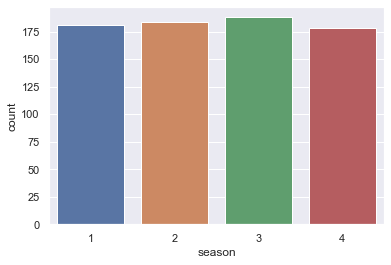

In [490]:
# season
print(d1['season'].value_counts())   # count of unique values.
print(pd.crosstab(d1['season'],columns='count',normalize=True))     # Percentage distribution among all categories. 
sns.countplot(x='season',data=d1)   # visualizing through bargraph.

# Result :
# 1. All the data is equally distributed to four categories.

1    366
0    365
Name: yr, dtype: int64
col_0  count
yr          
0      0.499
1      0.501


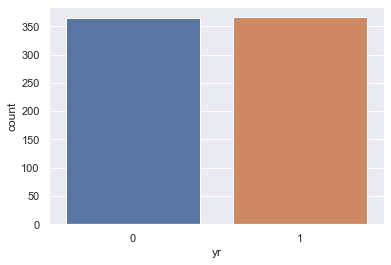

In [491]:
# Year
print(d1['yr'].value_counts())
print(pd.crosstab(d1['yr'],columns='count',normalize=True))
sns.countplot(x='yr',data=d1)

# Equally distributed

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
col_0  count
mnth        
1      0.085
2      0.078
3      0.085
4      0.082
5      0.085
6      0.082
7      0.085
8      0.085
9      0.082
10     0.085
11     0.082
12     0.085


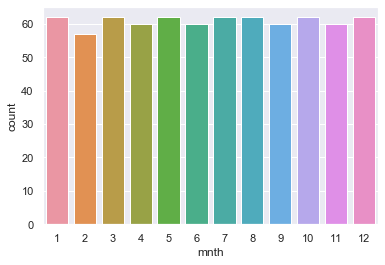

In [492]:
# Month
print(d1['mnth'].value_counts())
print(pd.crosstab(d1['mnth'],columns='count',normalize=True))
sns.countplot(x='mnth',data=d1)

# Equally distributed data.

0    710
1     21
Name: holiday, dtype: int64
col_0    count
holiday       
0        0.971
1        0.029


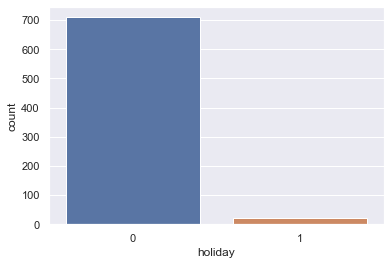

In [493]:
# Holiday
print(d1['holiday'].value_counts())
print(pd.crosstab(d1['holiday'],columns='count',normalize=True))
sns.countplot(x='holiday',data=d1)

# Highly skewed data or One-sided data.

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
col_0    count
weekday       
0        0.144
1        0.144
2        0.142
3        0.142
4        0.142
5        0.142
6        0.144


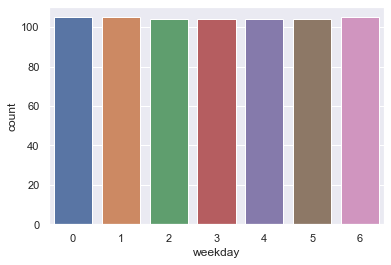

In [494]:
# Weekday
print(d1['weekday'].value_counts())
print(pd.crosstab(d1['weekday'],columns='count',normalize=True))
sns.countplot(x='weekday',data=d1)

# Equally distributed data.

1    500
0    231
Name: workingday, dtype: int64
col_0       count
workingday       
0           0.316
1           0.684


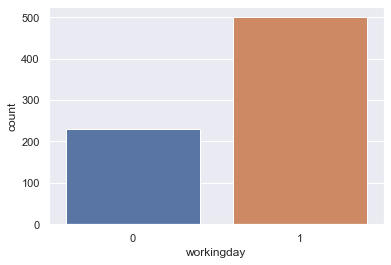

In [495]:
# Working Day
print(d1['workingday'].value_counts())
print(pd.crosstab(d1['workingday'],columns='count',normalize=True))
sns.countplot(x='workingday',data=d1)

# Well distributed data but slightly skewed.

1    463
2    247
3     21
Name: weathersit, dtype: int64
col_0       count
weathersit       
1           0.633
2           0.338
3           0.029


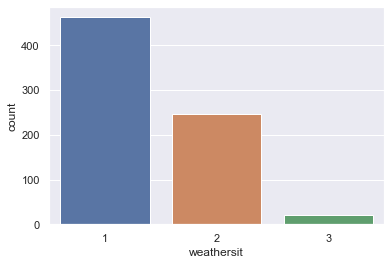

In [496]:
# Weather Situation
print(d1['weathersit'].value_counts())
print(pd.crosstab(d1['weathersit'],columns='count',normalize=True))
sns.countplot(x='weathersit',data=d1)

# Well distributed but skewed.

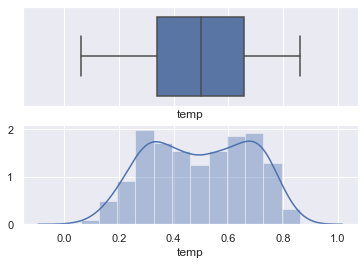

In [497]:
# Temp
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['temp'],ax=ax_box)
sns.distplot(d1['temp'],ax=ax_hist)


# Result :
# 1. Temp data is almost normally distributed with no outliers. 

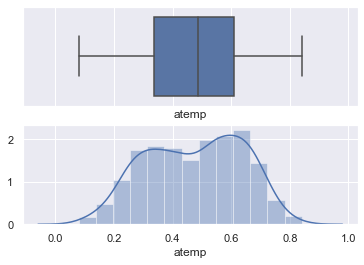

In [498]:
# ATemp
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['atemp'],ax=ax_box)
sns.distplot(d1['atemp'],ax=ax_hist)

# Very well distributed

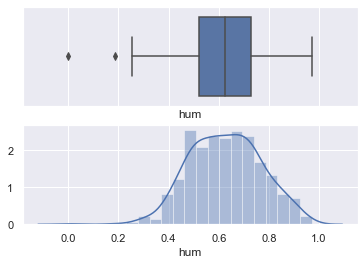

In [499]:
# Humidity
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['hum'],ax=ax_box)
sns.distplot(d1['hum'],ax=ax_hist)

# Result :
# 1. Humidity is normally distributed with some outliers.

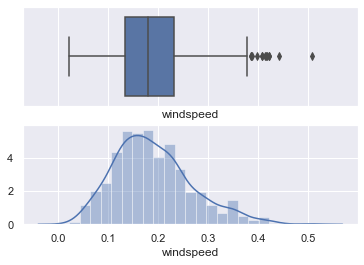

In [500]:
# Windspeed
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['windspeed'],ax=ax_box)
sns.distplot(d1['windspeed'],ax=ax_hist)

# Normally distributed data for windspeed.
# There are some outliers.

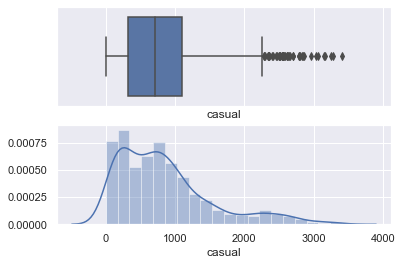

In [501]:
# Casual users
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['casual'],ax=ax_box)
sns.distplot(d1['casual'],ax=ax_hist)

# 1. Activeuser data is slightly right skewed.
# 2. There may or may not be outliers depends on further interpretation.

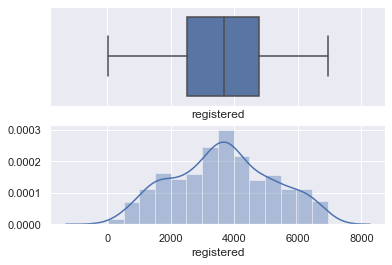

In [502]:
# Registered
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['registered'],ax=ax_box)
sns.distplot(d1['registered'],ax=ax_hist)

# Very well distributed

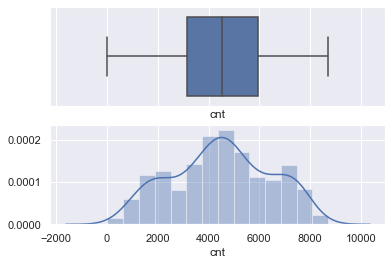

In [503]:
# Count
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True)

sns.boxplot(d1['cnt'],ax=ax_box)
sns.distplot(d1['cnt'],ax=ax_hist)

# Well distributed

# Bi-Variate Analysis

col_0     count
season         
1      2209.000
2      4941.500
3      5353.500
4      4634.500


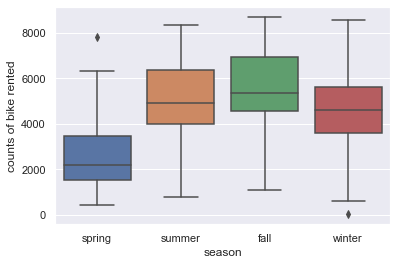

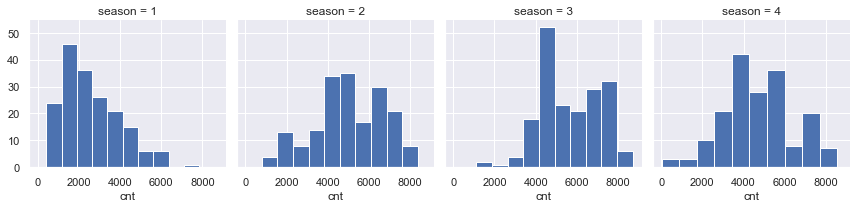

In [504]:
# Season vs count :

# Finding the average count of bike rented per season :
print(pd.crosstab(index=d1['season'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxplot :
sns.boxplot(x=d1['season'],y=d1['cnt'],data=d1)
plt.xticks([0,1,2,3],['spring','summer','fall','winter'])  # changing the name of labels
plt.ylabel('counts of bike rented')

# FacetGrid :
g=sns.FacetGrid(d1, col="season")
g.map(plt.hist,'cnt')

# Results:
# 1. Most of the bikes are rented in summer,fall & winter season.
# 2. Bikes rented in spring season are lesser comparitevly.
# 3. Significant variable,affecting the count and hence considered in modelling.

col_0  count
yr          
0       3740
1       5927


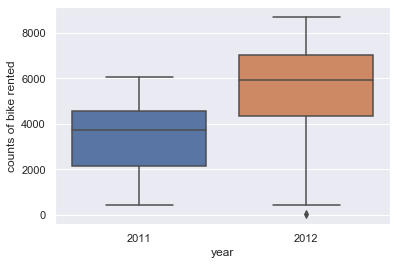

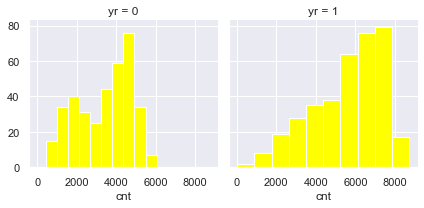

In [505]:
# Year vs Count

# Finding the average counts of bike rented per year :
print(pd.crosstab(index=d1['yr'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxplots :
sns.boxplot(x=d1['yr'],y=d1['cnt'],data=d1)
plt.xticks([0,1],['2011','2012'])  # changing the name of labels
plt.xlabel('year')
plt.ylabel('counts of bike rented')

# Facetplots :
g = sns.FacetGrid(d1, col='yr')
g.map(plt.hist,'cnt',color='yellow')

#Results :
# 1. Most of the bikes are rented in 2012.
# 2. According to the problem statement, 'Year' need not to be considered in modelling.
# 3. Insignificant variable.

col_0    count
mnth          
1     1939.000
2     2402.000
3     3216.500
4     4293.500
5     4890.500
6     5308.500
7     5446.500
8     5229.500
9     5384.000
10    5013.000
11    4081.000
12    3444.000


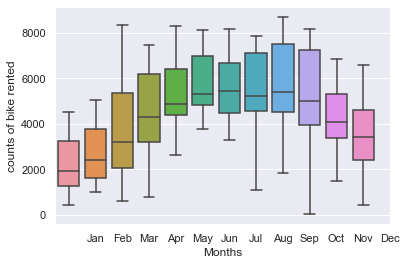

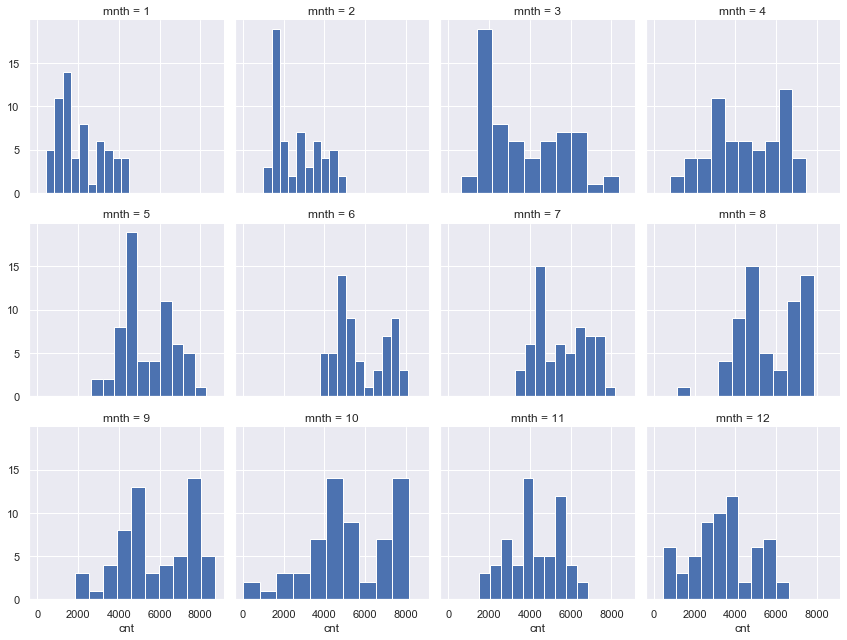

In [506]:
# Month vs Count

# Finding the average counts of bike rented per Month :
print(pd.crosstab(index=d1['mnth'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxplot :
sns.boxplot(x=d1['mnth'],y=d1['cnt'],data=d1)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])  # changing the name of labels
plt.xlabel('Months')
plt.ylabel('counts of bike rented')

# Facetgrid :
g = sns.FacetGrid(d1,col='mnth',col_wrap=4)
g.map(plt.hist,'cnt')

# Results :
# 1.Most of the bike are rented in the month of 'July'.
# 2.Least no of bikes are rented in the month of 'Jan'.
# 3.Bike renting data has a pattern(increasing and then decreasing) month-wise.
# 4.Significant for modelling.

col_0    count
holiday       
0         4558
1         3351


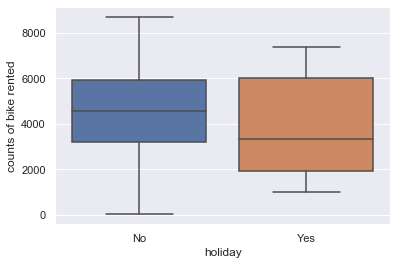

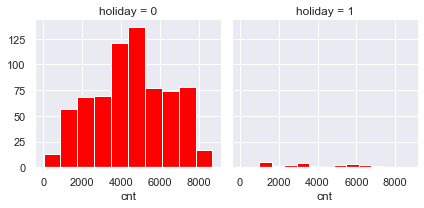

In [507]:
# Holiday Vs Count

# Finding the average count of bike rented on Holidays :
print(pd.crosstab(index=d1['holiday'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxpots :
sns.boxplot(x=d1['holiday'],y=d1['cnt'],data=d1)
plt.xticks([0,1],['No','Yes'])  # changing the name of labels
plt.ylabel('counts of bike rented')

# FacetGrid :
g = sns.FacetGrid(d1,col='holiday')
g.map(plt.hist,'cnt',color='red')

# Results :
# 1. Most bikes are rented on Non-holidays.
# 2. Significant variable for modelling.

col_0      count
weekday         
0       4334.000
1       4359.000
2       4576.500
3       4642.500
4       4721.000
5       4601.500
6       4521.000


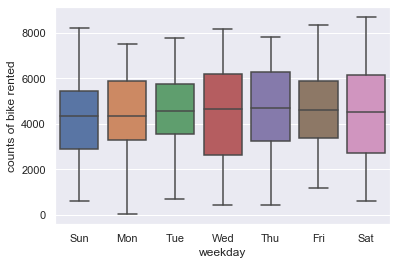

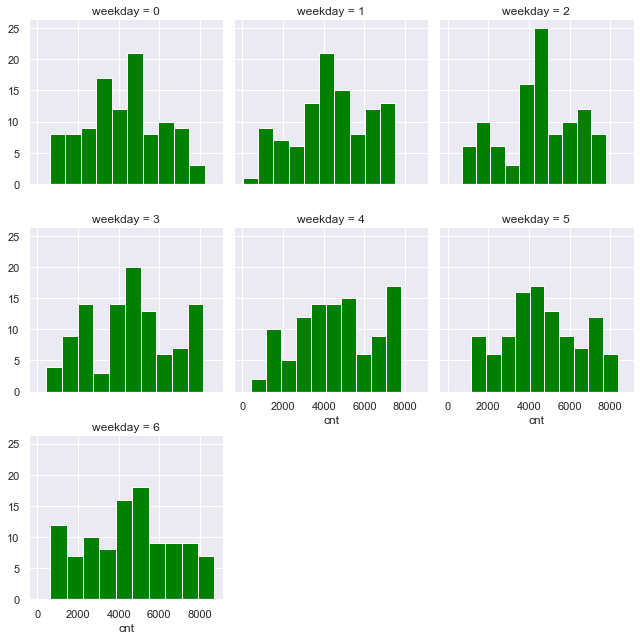

In [508]:
# Weekday Vs Count

# Finding the average count of bike rented on Weekdays :
print(pd.crosstab(index=d1['weekday'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxplots :
sns.boxplot(x=d1['weekday'],y=d1['cnt'],data=d1)
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])  # changing the name of labels
plt.ylabel('counts of bike rented')

# Facetgrid :
g=sns.FacetGrid(d1,col='weekday',col_wrap=3)
g.map(plt.hist,'cnt',color='green')
# Significant variable for modelling.

col_0       count
workingday       
0            4459
1            4582


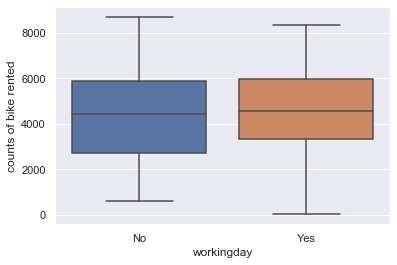

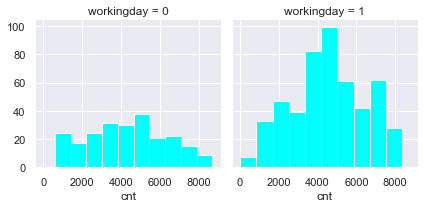

In [509]:
# Workingday Vs Count

# Finding the average count of bike rented on Workingdays :
print(pd.crosstab(index=d1['workingday'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxplots :
sns.boxplot(x=d1['workingday'],y=d1['cnt'],data=d1)
plt.xticks([0,1],['No','Yes'])  # changing the name of labels
plt.ylabel('counts of bike rented')

# Factegrids :
g=sns.FacetGrid(d1,col='workingday')
g.map(plt.hist,'cnt',color='cyan')

# Well distributed data.
# Most of the bikes are rented on working days.
# Significant for modelling.

col_0       count
weathersit       
1            4844
2            4040
3            1817


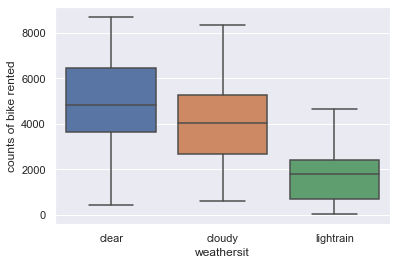

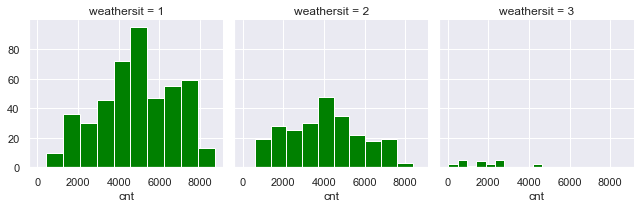

In [510]:
# Weather Situation Vs Count

# Finding the average count of bike rented per season :
print(pd.crosstab(index=d1['weathersit'],columns='count',values=d1['cnt'],aggfunc='median'))

# Boxplots :
sns.boxplot(x=d1['weathersit'],y=d1['cnt'],data=d1)
plt.xticks([0,1,2],['clear','cloudy','lightrain'])  # changing the name of labels
plt.ylabel('counts of bike rented')

# FacetGrids :
g=sns.FacetGrid(d1,col='weathersit')
g.map(plt.hist,'cnt',color='green')

# Results :
# 1. Bikes are rented more in clear weather than other situation.
# 2. Significant because affecting the count.

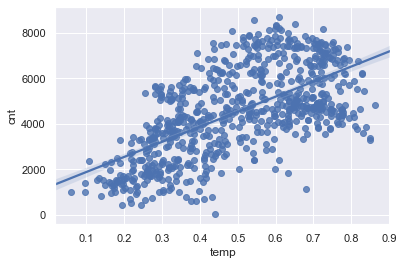

In [511]:
# Temp Vs Count
sns.regplot(x='temp',y='cnt',data=d1,scatter=True,fit_reg=True)

# Results :
# 1. Temp is affecting the count of bikes rent linearly.
# 2. As the temp is increasing count is also incresing.
# 3. Looks Significant for modelling.

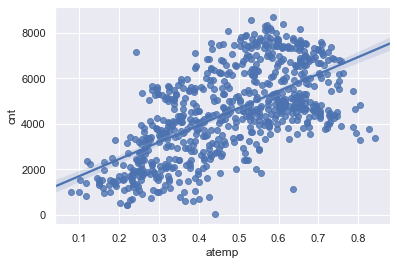

In [512]:
# Atemp Vs Count
sns.regplot(x='atemp',y='cnt',data=d1,scatter=True,fit_reg=True)

# Results :
# 1. Affecting linearly
# 2. Significant.

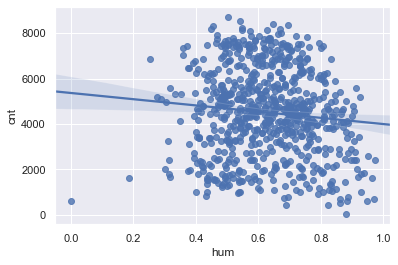

In [513]:
# Humidity Vs Count
sns.regplot(x='hum',y='cnt',data=d1,scatter=True,fit_reg=True)

# Results :
# 1. Looks linear relationship but further analysis needed.
# 2. Significant

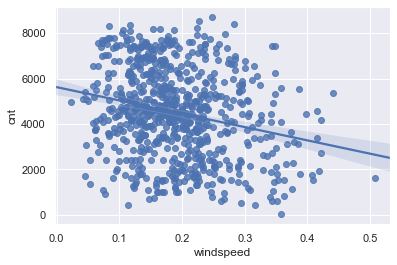

In [514]:
# Windspeed Vs Count
sns.regplot(x='windspeed',y='cnt',data=d1,scatter=True,fit_reg=True)

# Results :
# 1. Wind speed increment slows down the renting count.
# Significant for modelling.

# Multivariate Analysis

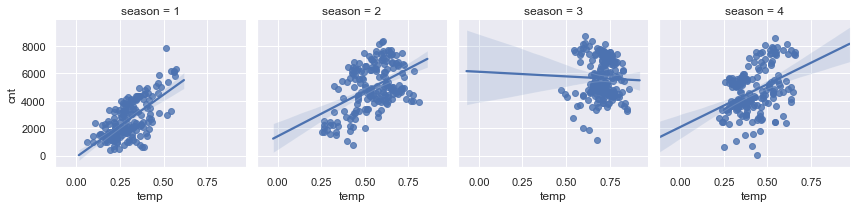

In [515]:
# Season + Temp ~ Count
g = sns.FacetGrid(d1,col='season')
g.map(sns.regplot,'temp','cnt',fit_reg=True)


# Results :
# 1. All the season have poistive relatioship between temp and count except season 3(Fall).
# 2. Average temp in Fall season is very high

C:\Users\prave\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


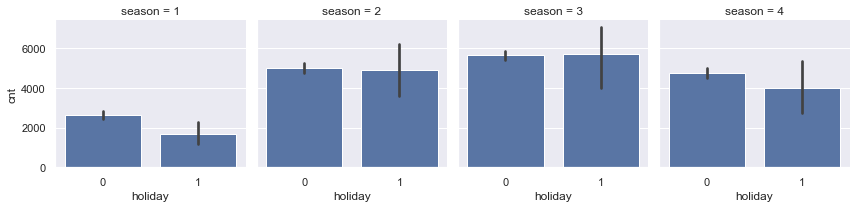

In [516]:
# Season + Holiday ~ Count
g = sns.FacetGrid(d1,col='season')
g.map(sns.barplot,'holiday','cnt')

# Results :
# 1. In every season,holiday seems to have no effect on rent count.

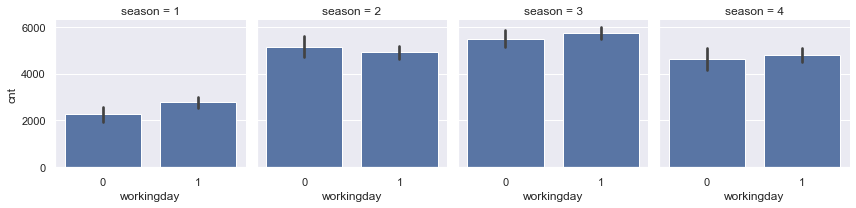

In [517]:
# Season + Workingday ~ Count
g=sns.FacetGrid(d1,col='season')
g.map(sns.barplot,'workingday','cnt')

# It seems that Workingday also does not have any effect season wise.

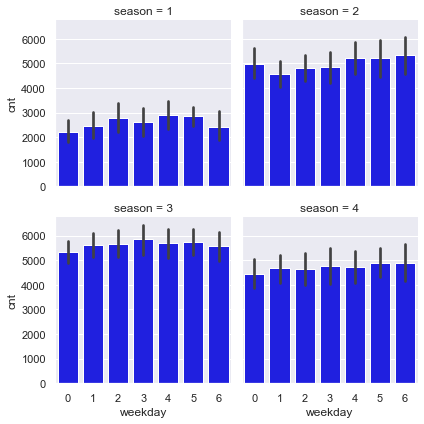

In [518]:
# Season + Weekday ~ Count
g = sns.FacetGrid(d1,col='season',col_wrap=2)
g.map(sns.barplot,'weekday','cnt',color='blue')

# Weekday has proper variation seasonwise. So it could be cosdiered as modelling.


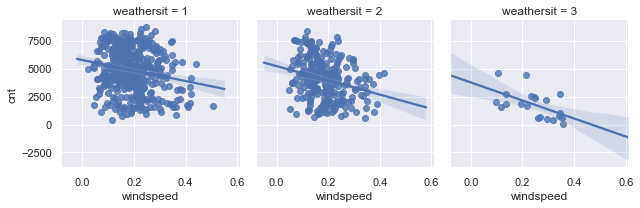

In [519]:
# Weather situation + Windspeed ~ Count
g = sns.FacetGrid(d1,col='weathersit')
g.map(sns.regplot,'windspeed','cnt')

# Clearly Shows that bike count is decreasing as the windspeed is increasing and weather situation is getting worse.


# Outlier Analysis

In [520]:
# Defining the column names which has outliers :
col_num = ['temp','atemp','hum','windspeed','cnt']

In [521]:
print(d1.shape)

(731, 15)


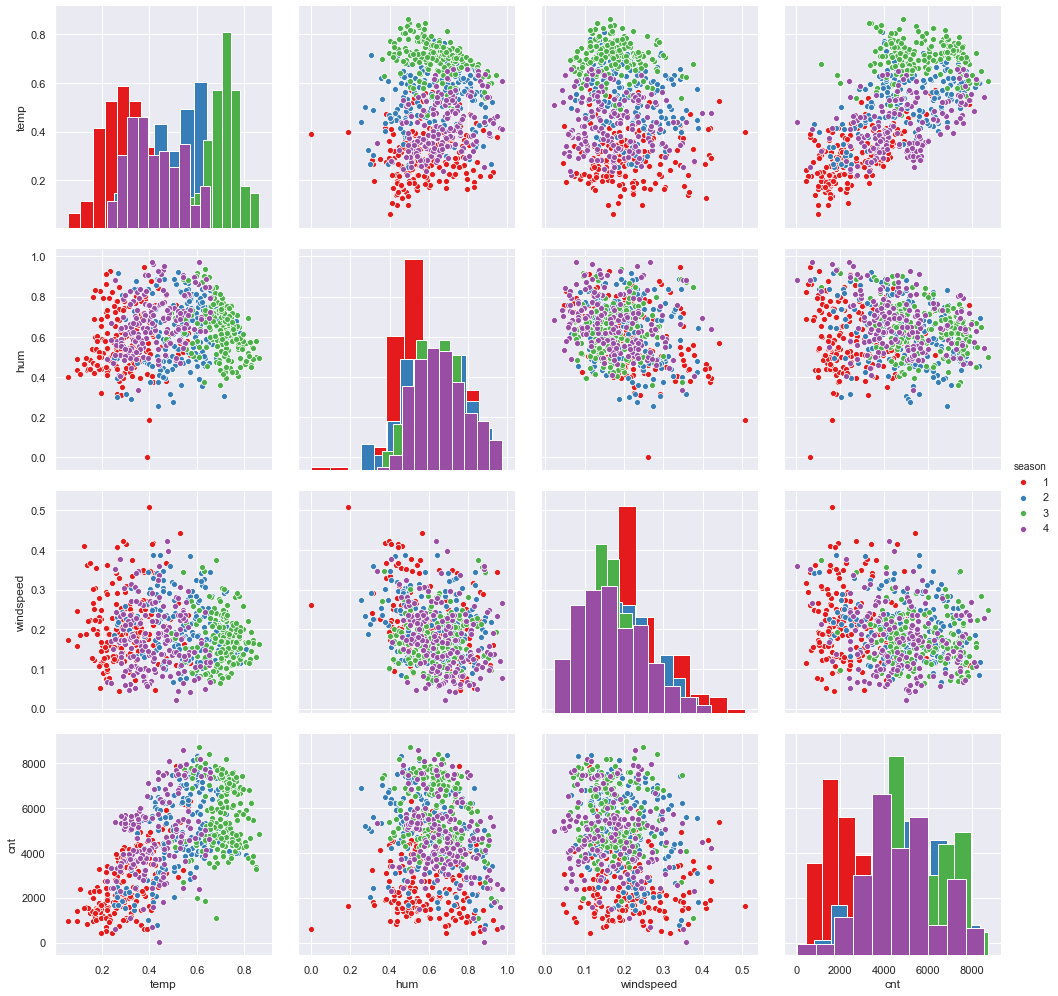

In [522]:
# Visualization before Removing outliers :
g = sns.pairplot(d1,hue='season',vars=['temp','hum','windspeed','cnt'],palette="Set1",diag_kind='hist',height=3.5)

In [523]:
# Detect and delete outliers from data
for i in col_num:
    print(i)
    q75,q25 = np.percentile(d1.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    d1.drop(d1[d1.loc[:,i] < min].index,inplace=True)
    d1.drop(d1[d1.loc[:,i] > max].index,inplace=True)

temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
cnt
-1011.5
10256.5


In [524]:
print(d1.shape)

(717, 15)


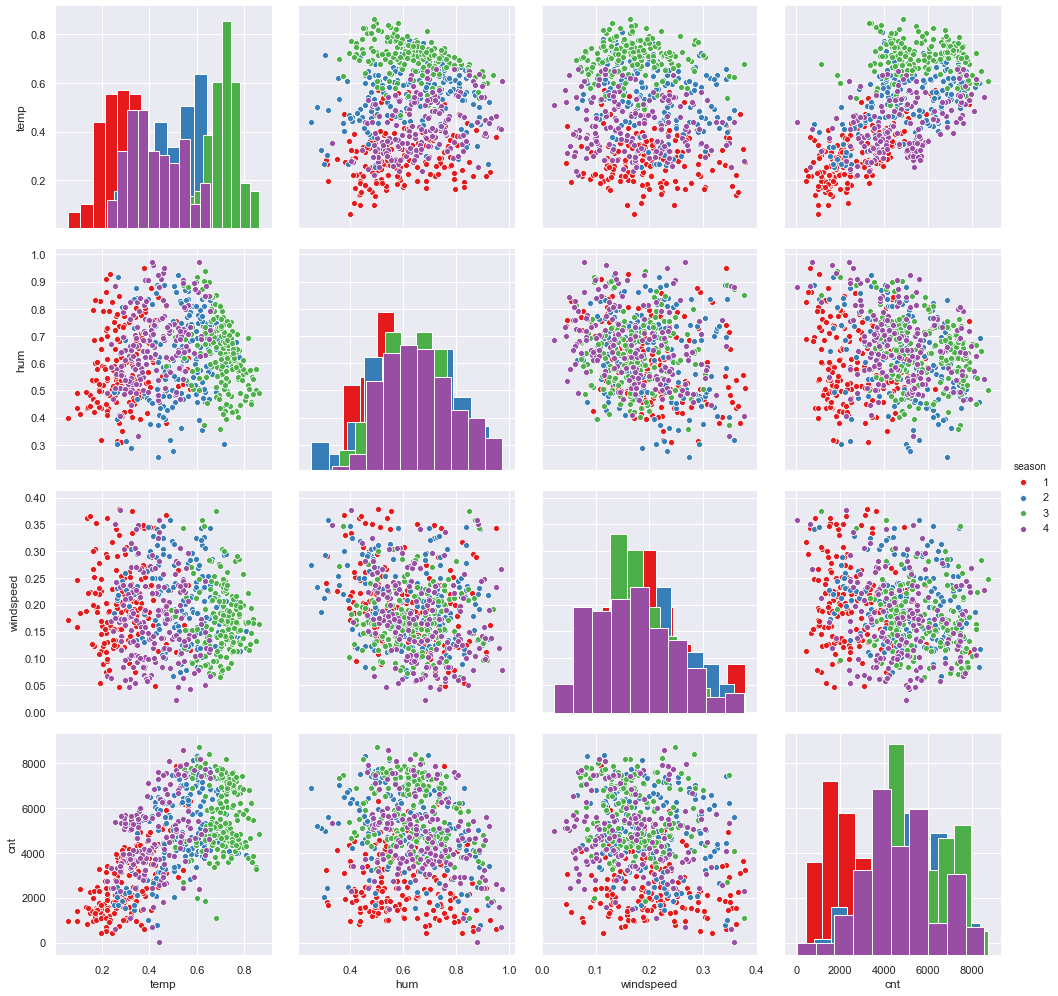

In [525]:
# Visualization after removing outliers :
g = sns.pairplot(d1,hue='season',vars=['temp','hum','windspeed','cnt'],palette="Set1",diag_kind='hist',height=3.5)

# Feature Selection 

In [526]:
# Finding the column names :
d1.columns

Index(['date', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [527]:
# Dropping insignificant variables
col_drop = ['date','yr','holiday','casual','registered']
d1_clean = d1.drop(col_drop,axis=1)

In [528]:
# Finding the correlation between all the numerical variables :
corr_mat = d1_clean.corr(method='pearson')
print(corr_mat)

# Sorting the correlation values :
d1_clean.corr(method='pearson').loc[:,'cnt'].abs().sort_values(ascending=False)[1:]

            temp  atemp    hum  windspeed    cnt
temp       1.000  0.992  0.114     -0.140  0.626
atemp      0.992  1.000  0.127     -0.166  0.629
hum        0.114  0.127  1.000     -0.204 -0.137
windspeed -0.140 -0.166 -0.204      1.000 -0.216
cnt        0.626  0.629 -0.137     -0.216  1.000


atemp       0.629
temp        0.626
windspeed   0.216
hum         0.137
Name: cnt, dtype: float64

In [529]:
# Significant variables :
# 1. temp
# 2. windspeed

In [530]:
# Correlation between categorical data(chi2-test) :
col_categ = ['season','mnth','weekday','workingday','weathersit']

factors_paired = [(i,j) for i in col_categ for j in col_categ] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(d1_clean[f[0]], d1_clean[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((5,5))
p1 = pd.DataFrame(p1, index=col_categ, columns=col_categ)
print(p1)

            season  mnth  weekday  workingday  weathersit
season       0.000 0.000    1.000       0.946       0.013
mnth         0.000 0.000    1.000       0.993       0.010
weekday      1.000 1.000    0.000       0.000       0.249
workingday   0.946 0.993    0.000       0.000       0.294
weathersit   0.013 0.010    0.249       0.294       0.000


In [531]:
# Non-Correlated variables(Independent) combination, which can be used in modelling  together:
# 1. season + weekday + workingday 
# 2. month + weekday + workingday
# 3. workingday + weather situation
# 4. weekday + weather situation

# Further analysis is needed to check dependency with the output variable with ANOVA test. 

In [532]:
# Significant variables overall :
# temp,windspeed,season,month,weekday,workingday,weather situation


In [533]:
d1_clean.columns

Index(['season', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [534]:
# Final Dataframe for modelling :
d1_model = d1_clean.drop(['hum','atemp'],axis='columns')
print(d1_model.columns)
print(d1_model.shape)

Index(['season', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'windspeed', 'cnt'], dtype='object')
(717, 8)


# Modelling

In [535]:
# Importing necessary libraries :
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [536]:
#===============================================================
#     First set of models ( All significant Variables)
#===============================================================

In [537]:
d1_model = pd.get_dummies(d1_model,drop_first= False)

In [538]:
# Separating Input and Output variable : 
x = d1_model.drop(['cnt'],axis='columns',inplace=False)
y = d1_model['cnt']

In [539]:
# Splitting the data into train and test set :
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(501, 30) (216, 30) (501,) (216,)


In [540]:
# Base line model :
# "" We are making a base model with the test data mean value.This is to set a benchmark and to compare withour regression models.""""

# Finding the mean for test data value :
base_pred = np.mean(y_test)
print('mean value for base model =',base_pred)

# Repeating the same value till length of test data :
base_pred = np.repeat(base_pred, len(y_test))

# Finding RMSE :
base_rmse = np.sqrt(mean_squared_error(y_test,base_pred))
print('RMSE for base model =',base_rmse)

# "Now every model must have error less than the rmse for base model"

mean value for base model = 4605.1712962962965
RMSE for base model = 1771.0577304386404


RMSE for first Linear regression model = 1377.266535529307
R2 value for test set= 0.3952574113860464
R2 value for train set= 0.606821243535683


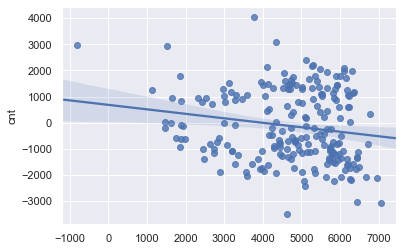

In [541]:
#================ Linear regression ========================

# Setting intercept as true :
lgr = LinearRegression(fit_intercept=True)

# Model :
model_lin1 = lgr.fit(X_train,y_train)

# Predicting model on the test set :
model_pred_lin1 = lgr.predict(X_test)

# Computing MSE and RMSE :
lin1_mse = mean_squared_error(y_test,model_pred_lin1)
lin1_rmse = np.sqrt(lin1_mse)
print("RMSE for first Linear regression model =",lin1_rmse)

# Conclusion : RMSE for First linear regression model is less than RMSE for base model.

# R squared value :
r2_lin1_test = model_lin1.score(X_test,y_test)
r2_lin1_train = model_lin1.score(X_train,y_train)
print('R2 value for test set=',r2_lin1_test)
print('R2 value for train set=',r2_lin1_train)

# Conclusion : As the R2 value is not good for test set. We wil further analyze residulas.

# Regression diagnostic ==> Residual plot analysis
residuals1 = y_test - model_pred_lin1
sns.regplot(x=model_pred_lin1,y=residuals1,scatter=True,fit_reg=True,data=d1_model )

# Conclusions : NO pattern found.

In [542]:
#======================= Random Forest ===========================

# Model Parameters :
rf = RandomForestRegressor()

# Model
rf1 = rf.fit(X_train,y_train)

# Predicting model on test :
model_pred_rf1 = rf.predict(X_test)

# Computing MSE and RMSE :
rf1_mse = mean_squared_error(y_test, model_pred_rf1)
rf1_rmse = np.sqrt(rf1_mse)
print('RMSE for Random forest =',rf1_rmse)


# R Squared value :
r2_rf1_test = rf1.score(X_test,y_test)
r2_rf1_train = rf1.score(X_train,y_train)
print('R2 value for test set=',r2_rf1_test)
print('R2 value for train set=',r2_rf1_train)

# Conclusion : The variablity of the model for explaining test set is very low.

RMSE for Random forest = 1368.5082709597284
R2 value for test set= 0.402924271514867
R2 value for train set= 0.9160934945313368


C:\Users\prave\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [543]:
#==================== SUPPORT VECTOR REGRESSOR======================

clf = svm.SVR()
svr = clf.fit(X_train,y_train)
model_pred_svr = clf.predict(X_test)

svr_mse = mean_squared_error(y_test, model_pred_svr)
svr_rmse = np.sqrt(svr_mse)
print('RMSE for Support Vector Regression =',svr_rmse)

# R Squared value :
r2_svr_test = svr.score(X_test,y_test)
r2_svr_train = svr.score(X_train,y_train)
print('R2 value for test set=',r2_svr_test)
print('R2 value for train set=',r2_svr_train)

# CONCLUSION : Bad model.

C:\Users\prave\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE for Support Vector Regression = 1769.1814335167403
R2 value for test set= 0.0021177209470581992
R2 value for train set= 0.003908108601435645


In [544]:
#===============================================================
#     Second set of Models : season ~ count                                                                                                                                                                                                                                                                                                                                                            
#===============================================================

In [545]:
# New dataframe :
d2 = d1_clean[['season','cnt']]

In [546]:
# Making dummies :
d2_model = pd.get_dummies(d2,drop_first= False)

In [547]:
# Separating Input and Output variable : 
x = d2_model.drop(['cnt'],axis='columns',inplace=False)
y = d2_model['cnt']

In [548]:
# Splitting the data into train and test set :
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(501, 4) (216, 4) (501,) (216,)


In [549]:
#================ Linear Regression =====================

# Setting the intercept :
lgr = LinearRegression(fit_intercept=True)

# Model :
model_lin2 = lgr.fit(X_train,y_train)

# Predicting model on the test set :
model_pred_lin2 = lgr.predict(X_test)

# Computing MSE and RMSE :
lin2_mse = mean_squared_error(y_test,model_pred_lin2)
lin2_rmse = np.sqrt(lin2_mse)
print("RMSE for second Linear regression model =",lin2_rmse)

# Conclusion : RMSE for First linear regression model is less than RMSE for base model.

# R squared value :
r2_lin2_test = model_lin2.score(X_test,y_test)
r2_lin2_train = model_lin2.score(X_train,y_train)
print('R2 value for test set=',r2_lin2_test)
print('R2 value for train set=',r2_lin2_train)

# Conclusion : This model is not good. Further modelling needed.

RMSE for second Linear regression model = 1575.7515329259618
R2 value for test set= 0.2083922439588234
R2 value for train set= 0.3859836963570246


In [550]:
#===============================================================
#     Third set of Models :  temp ~ count                                                                                                                                                                                                                                                                                                                                                            
#===============================================================

In [551]:
# Separating input and output variables  :
x = d1_clean['temp']
y = d1_clean['cnt']

In [552]:
# Reshaping 'temp' variable :
x = np.array(x).reshape((-1,1))

In [553]:
# Splitting the data into train and test set :
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(501, 1) (216, 1) (501,) (216,)


RMSE for second Linear regression model = 1463.5857623723152
R2 value for test set= 0.31707829451160374
R2 value for train set= 0.41516908541973185


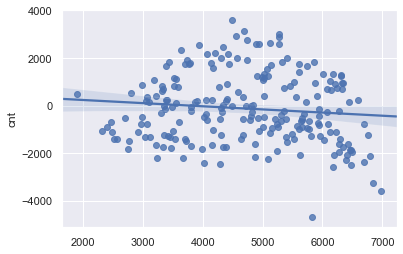

In [554]:
# Setting the intercept :
lgr = LinearRegression(fit_intercept=True)

# Model :
model_lin3 = lgr.fit(X_train,y_train)

# Predicting model on the test set :
model_pred_lin3 = lgr.predict(X_test)

# Computing MSE and RMSE :
lin3_mse = mean_squared_error(y_test,model_pred_lin3)
lin3_rmse = np.sqrt(lin3_mse)
print("RMSE for second Linear regression model =",lin3_rmse)

# Conclusion : RMSE for Third linear regression model is less than RMSE for base model.

# R squared value :
r2_lin3_test = model_lin3.score(X_test,y_test)
r2_lin3_train = model_lin3.score(X_train,y_train)
print('R2 value for test set=',r2_lin3_test)
print('R2 value for train set=',r2_lin3_train)

# Regression diagnostic ==> Residual plot analysis
residuals3 = y_test - model_pred_lin3
sns.regplot(x=model_pred_lin3,y=residuals3,scatter=True,fit_reg=True,data=d1_clean )

# Conclusions : NO pattern found.

In [555]:
#======================= Random Forest ===========================

# Model Parameters :
rf = RandomForestRegressor()

# Model
rf3 = rf.fit(X_train,y_train)

# Predicting model on test :
model_pred_rf3 = rf.predict(X_test)

# Computing MSE and RMSE :
rf3_mse = mean_squared_error(y_test, model_pred_rf3)
rf3_rmse = np.sqrt(rf3_mse)
print('RMSE for Random forest =',rf3_rmse)


# R Squared value :
r2_rf3_test = rf3.score(X_test,y_test)
r2_rf3_train = rf3.score(X_train,y_train)
print('R2 value for test set=',r2_rf3_test)
print('R2 value for train set=',r2_rf3_train)

# Conclusion : The variablity of the model for explaining test set is very low.
# overallaccuracy increased.

RMSE for Random forest = 1681.5040326590063
R2 value for test set= 0.09857335622443597
R2 value for train set= 0.8216301554523222


C:\Users\prave\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [556]:
#===============================================================
#     Fourth set of Models :  windspeed ~ count                                                                                                                                                                                                                                                                                                                                                            
#===============================================================

In [557]:
x = d1_clean['windspeed']
y = d1_clean['cnt']

In [558]:
# Reshaping 'temp' variable :
x = np.array(x).reshape((-1,1))

In [559]:
# Splitting the data into train and test set :
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(501, 1) (216, 1) (501,) (216,)


RMSE for second Linear regression model = 1740.1629391779486
R2 value for test set= 0.03458421750002627
R2 value for train set= 0.04965629185603371


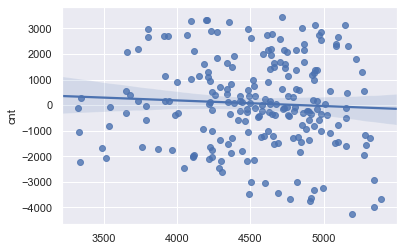

In [560]:
# Setting the intercept :
lgr = LinearRegression(fit_intercept=True)

# Model :
model_lin4 = lgr.fit(X_train,y_train)

# Predicting model on the test set :
model_pred_lin4 = lgr.predict(X_test)

# Computing MSE and RMSE :
lin4_mse = mean_squared_error(y_test,model_pred_lin4)
lin4_rmse = np.sqrt(lin4_mse)
print("RMSE for second Linear regression model =",lin4_rmse)

# Conclusion : This vAriable is not a good choice for modelling.

# R squared value :
r2_lin4_test = model_lin4.score(X_test,y_test)
r2_lin4_train = model_lin4.score(X_train,y_train)
print('R2 value for test set=',r2_lin4_test)
print('R2 value for train set=',r2_lin4_train)

# Regression diagnostic ==> Residual plot analysis
residuals4 = y_test - model_pred_lin4
sns.regplot(x=model_pred_lin4,y=residuals4,scatter=True,fit_reg=True,data=d1_clean )

# Conclusions : NO pattern found.But model is not able to capture variability.

In [561]:
#===============================================================
#     Fifth set of Models :  windspeed+temp ~ count                                                                                                                                                                                                                                                                                                                                                            
#===============================================================

In [562]:
x = d1_clean[['windspeed','temp']]
y = d1_clean['cnt']

In [563]:
# Splitting the data into train and test set :
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(501, 2) (216, 2) (501,) (216,)


RMSE for second Linear regression model = 1442.4051989389227
R2 value for test set= 0.3367013364512055
R2 value for train set= 0.431017220844768


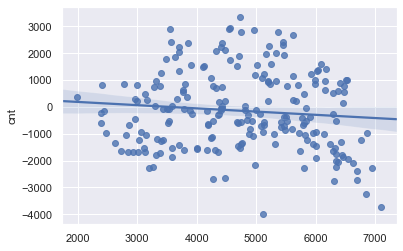

In [564]:
# Setting the intercept :
lgr = LinearRegression(fit_intercept=True)

# Model :
model_lin5 = lgr.fit(X_train,y_train)

# Predicting model on the test set :
model_pred_lin5 = lgr.predict(X_test)

# Computing MSE and RMSE :
lin5_mse = mean_squared_error(y_test,model_pred_lin5)
lin5_rmse = np.sqrt(lin5_mse)
print("RMSE for second Linear regression model =",lin5_rmse)

# Conclusion : These vriable is not a good choice for mod-elling.

# R squared value :
r2_lin5_test = model_lin5.score(X_test,y_test)
r2_lin5_train = model_lin5.score(X_train,y_train)
print('R2 value for test set=',r2_lin5_test)
print('R2 value for train set=',r2_lin5_train)

# Regression diagnostic ==> Residual plot analysis
residuals5 = y_test - model_pred_lin5
sns.regplot(x=model_pred_lin5,y=residuals5,scatter=True,fit_reg=True,data=d1_clean )

# Conclusions : NO pattern found.But model is not able to capture variability.

In [565]:
# BEST MODEL : The RANDOM FOREST MODEL on the First set of varaibles are giving good results with less error than base model.
# So I will choose the RANDOM FOREST modelling for this set of data.